# TSA: Explore

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('ggplot')

## Store Data

In [4]:
df = pd.read_csv('store_item_demand.csv')
df.sale_date = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date')

We're going to use the last year as the test dataset

In [4]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [5]:
train = df.loc[:'2016']
test = df.loc['2017']

<AxesSubplot:xlabel='sale_date'>

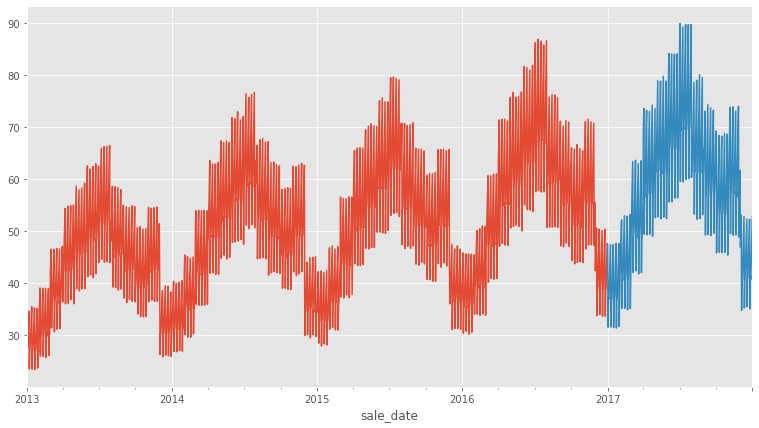

In [6]:
train.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot()

In [7]:
y = train.resample('D').sale_amount.mean()

> Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

In [9]:
y.describe()

count    1461.000000
mean       50.610229
std        12.255189
min        23.418000
25%        41.718000
50%        50.606000
75%        59.088000
max        86.854000
Name: sale_amount, dtype: float64

Text(0, 0.5, 'Difference in sales from one day to the next')

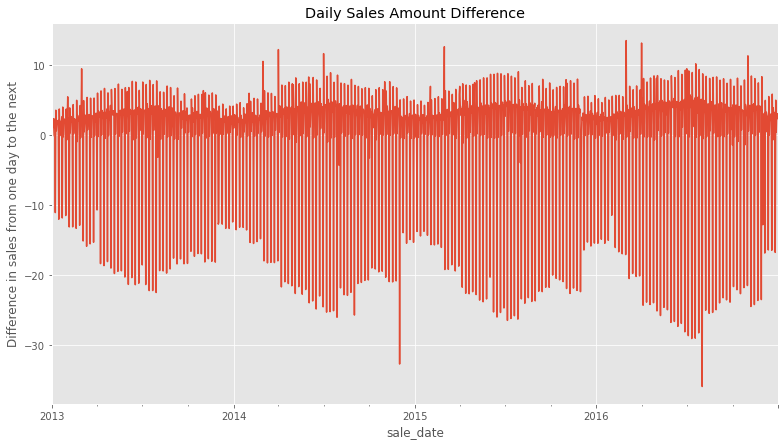

In [8]:
y.diff().plot()
plt.title('Daily Sales Amount Difference')
plt.ylabel('Difference in sales from one day to the next')

Maybe it would be helpful to look at percent change as well:

Percent change is defined as the amount of change as a percentage of the old value.

Text(0, 0.5, '% Change')

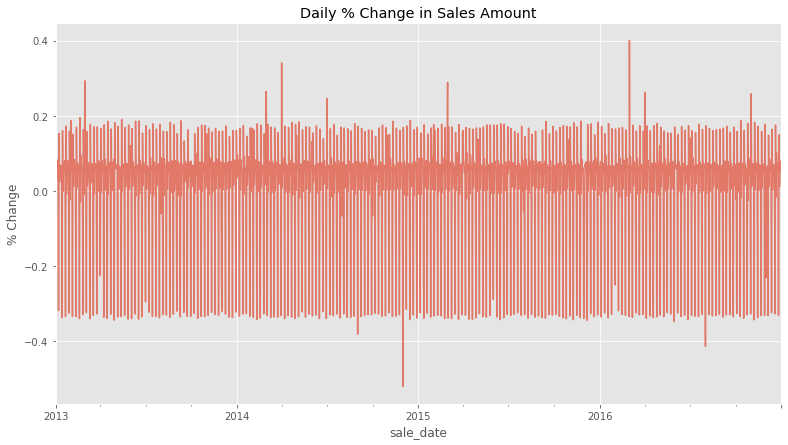

In [10]:
(y.diff() / y.shift()).plot(alpha=.7)
plt.title('Daily % Change in Sales Amount')
plt.ylabel('% Change')

Let's take a look at this week over week and month over month as well.

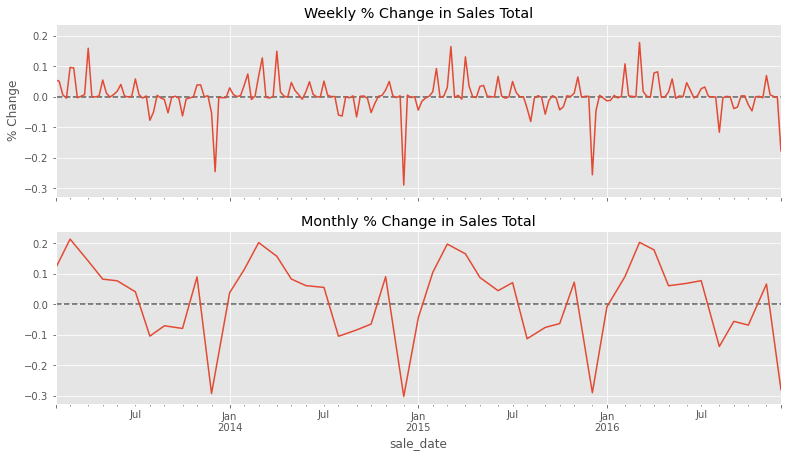

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')
ax1.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
ax2.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

In [12]:
y.pct_change()

sale_date
2013-01-01         NaN
2013-01-02   -0.001314
2013-01-03    0.059219
2013-01-04    0.082068
2013-01-05    0.035721
                ...   
2016-12-27    0.149130
2016-12-28    0.011323
2016-12-29    0.079294
2016-12-30    0.056132
2016-12-31    0.067097
Freq: D, Name: sale_amount, Length: 1461, dtype: float64

(NB There's also a `pct_change` Series method.)

> Plot a time series decomposition.

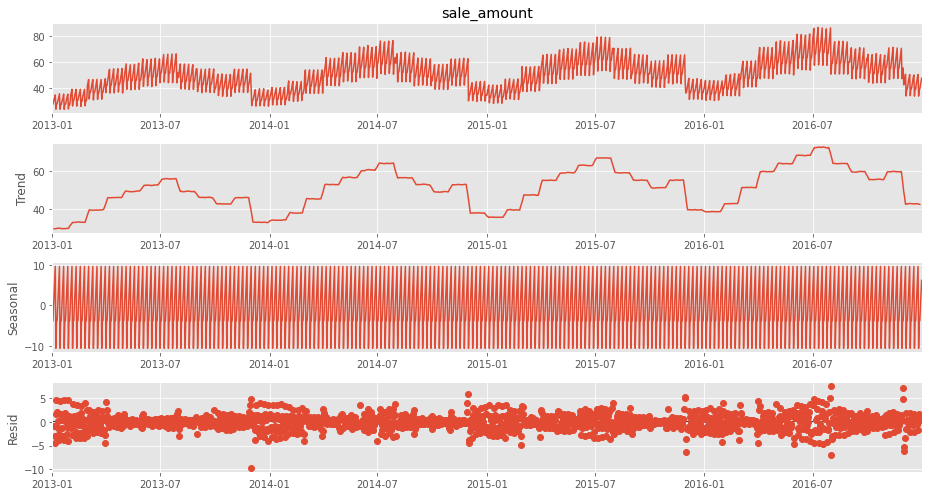

In [13]:
sm.tsa.seasonal_decompose(y).plot()
None

This doesn't look terribly useful, let's try a different frequency.

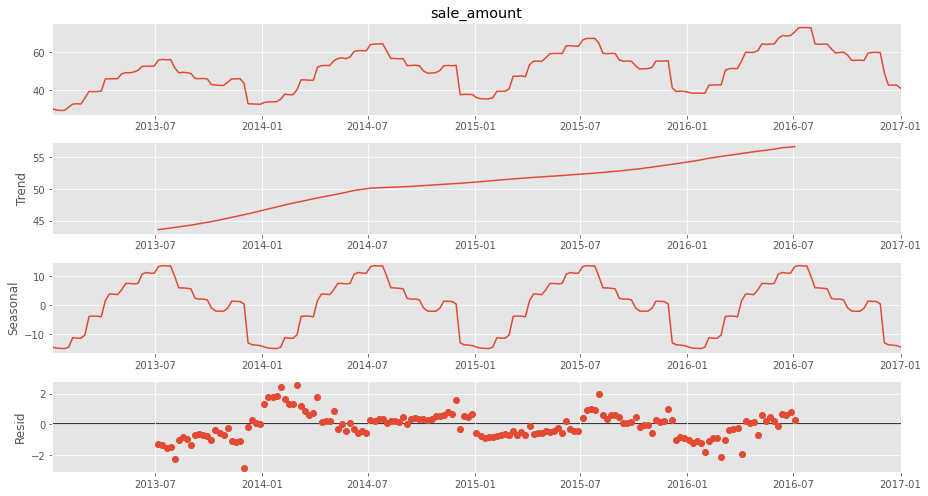

In [14]:
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
None

> Create a lag plot (day over day).

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

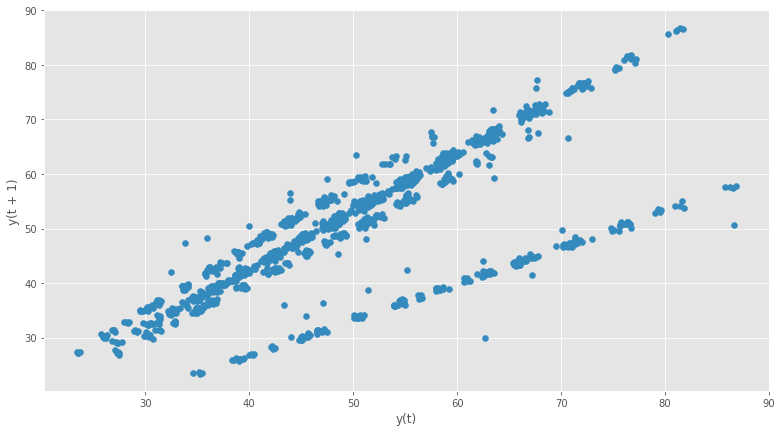

In [16]:
pd.plotting.lag_plot(y, 1)

Let's look at multiple lag periods for the montly data:

In [21]:
import numpy as np

m = np.arange(12).reshape(3, -1)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
m.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

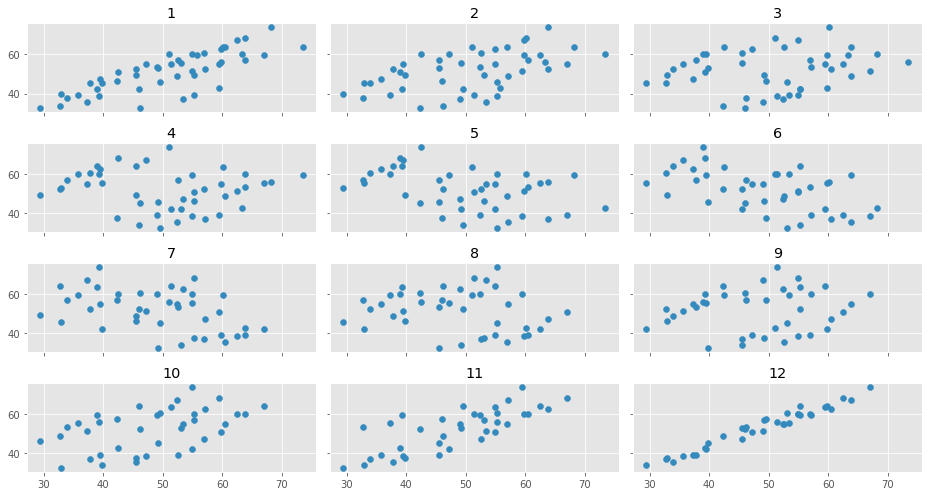

In [17]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), range(1, 13)):
    pd.plotting.lag_plot(monthly, lag=lag, ax=ax)
    ax.set(title=lag, xlabel='', ylabel='')
    
fig.tight_layout()

> Run a lag correlation.

In [24]:
pd.DataFrame({
    'y': y,
    'y(t + 1)': y.shift(-1),
    'y(t + 2)': y.shift(-2)
}).corr()

,y,y(t + 1),y(t + 2)
y,1.000000,0.749140,0.666715
y(t + 1),0.749140,1.000000,0.748519
y(t + 2),0.666715,0.748519,1.000000


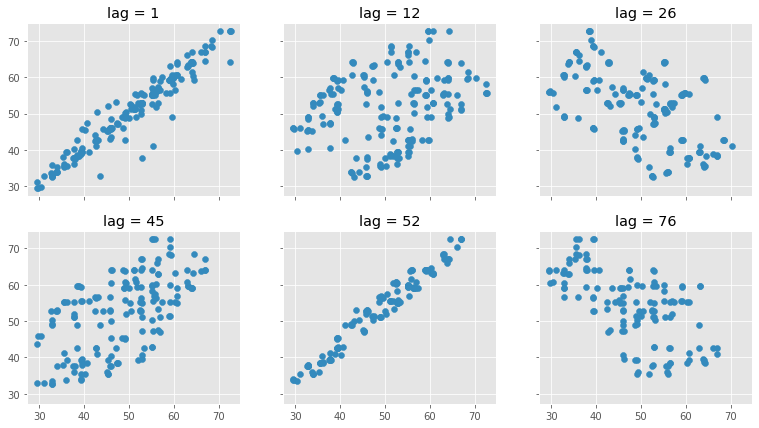

In [25]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), [1, 12, 26, 45, 52, 76]):
    pd.plotting.lag_plot(weekly, lag=lag, ax=ax)
    ax.set(title='lag = ' + str(lag), xlabel='', ylabel='')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

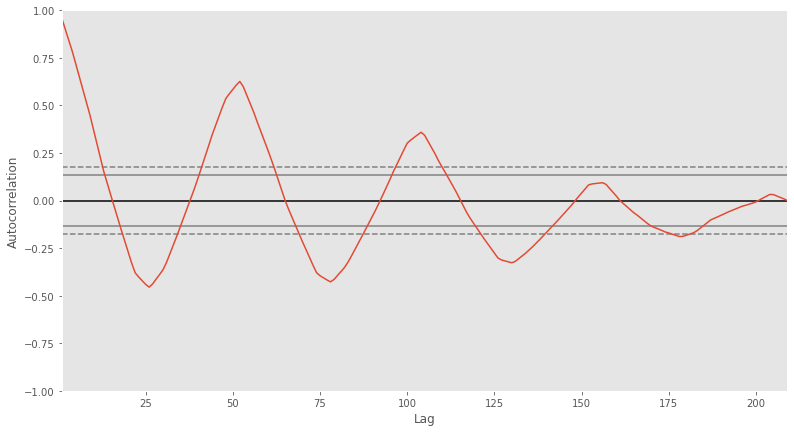

In [26]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

To compare:

Text(0.5, 1.0, 'Autocorrelation of Random Noise')

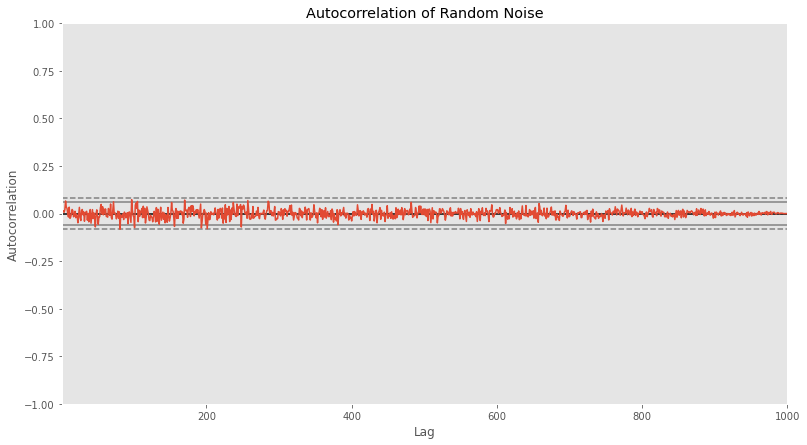

In [27]:
import numpy as np
x = np.random.randn(1000)
pd.plotting.autocorrelation_plot(x)
plt.title('Autocorrelation of Random Noise')

## German Energy Data

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df.Date = pd.to_datetime(df.Date)
print(df.shape)
df.head()

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [29]:
df.fillna(0)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,0.000,0.000,0.000
1,2006-01-02,1380.52100,0.000,0.000,0.000
2,2006-01-03,1442.53300,0.000,0.000,0.000
3,2006-01-04,1457.21700,0.000,0.000,0.000
4,2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


Using the percent cutoff method:

In [30]:
train_pct = .8
n = df.shape[0]
test_start_index = round(n * train_pct)

train = df[:test_start_index]
test = df[test_start_index:]

train = train.set_index('Date').resample('D').mean()
test = test.set_index('Date').resample('D').mean()

<AxesSubplot:xlabel='Date'>

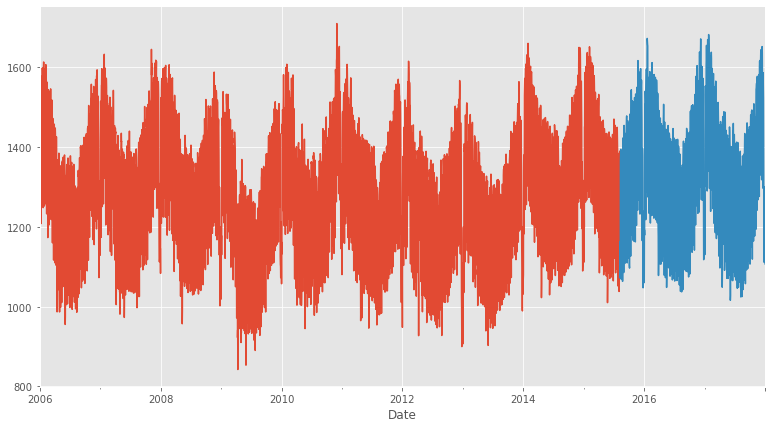

In [31]:
train.Consumption.plot()
test.Consumption.plot()

In [32]:
y = train.Consumption

<AxesSubplot:xlabel='Date', ylabel='Date'>

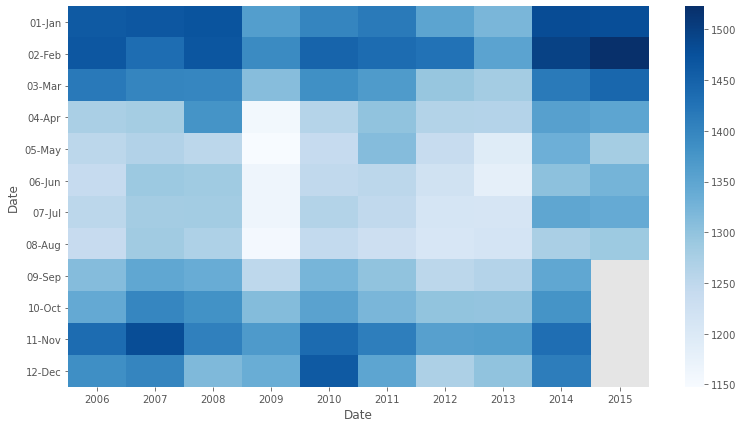

In [33]:
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack(0)
sns.heatmap(table, cmap='Blues')

In [35]:
table

Date,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Date,,,,,,,,,,
01-Jan,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935,1483.261323,1479.451968
02-Feb,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429,1496.465536,1522.838964
03-Mar,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581,1416.458355,1443.586774
04-Apr,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967,1357.582700,1350.108400
05-May,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032,1332.490710,1280.312677
06-Jun,1241.781667,1290.828733,1286.797100,1166.456833,1247.938433,1254.294333,1222.315667,1181.999000,1303.712233,1325.948067
07-Jul,1253.296290,1281.134258,1282.866355,1164.515871,1263.467452,1248.768194,1212.953710,1211.503484,1348.810258,1341.598968
08-Aug,1241.188774,1284.554355,1269.323484,1156.114645,1245.832323,1229.204935,1208.466258,1213.691355,1274.170968,1288.923857
09-Sep,1311.169933,1347.857500,1339.615433,1250.585967,1324.003533,1300.706833,1254.097633,1262.723900,1347.642400,NaN


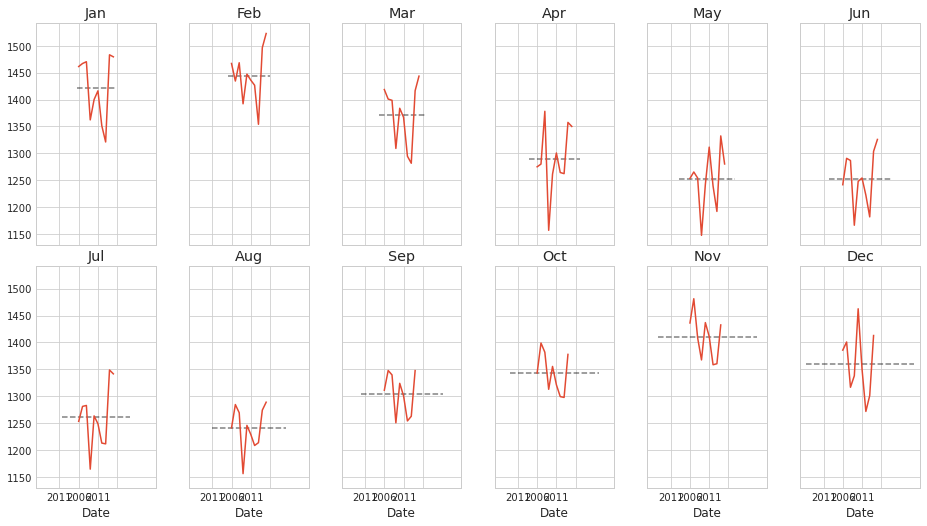

In [37]:
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, 6, sharex=True, sharey=True)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
for ax, (month, x) in zip(axs.ravel(), table.T.iteritems()):
    x.plot(ax=ax, title=month[3:])
    ax.hlines(x.mean(), *ax.get_xlim(), color='black', alpha=.5, ls='--')

Text(0.5, 1.0, 'Daily % Change in Consumption')

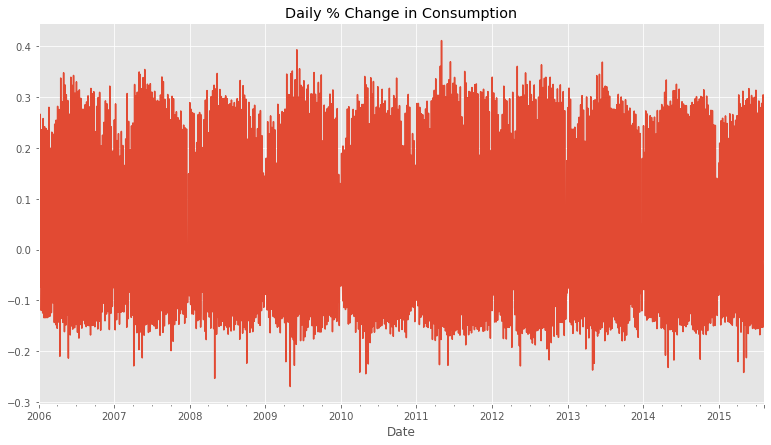

In [38]:
(y.diff() / y.shift()).plot()
plt.title('Daily % Change in Consumption')

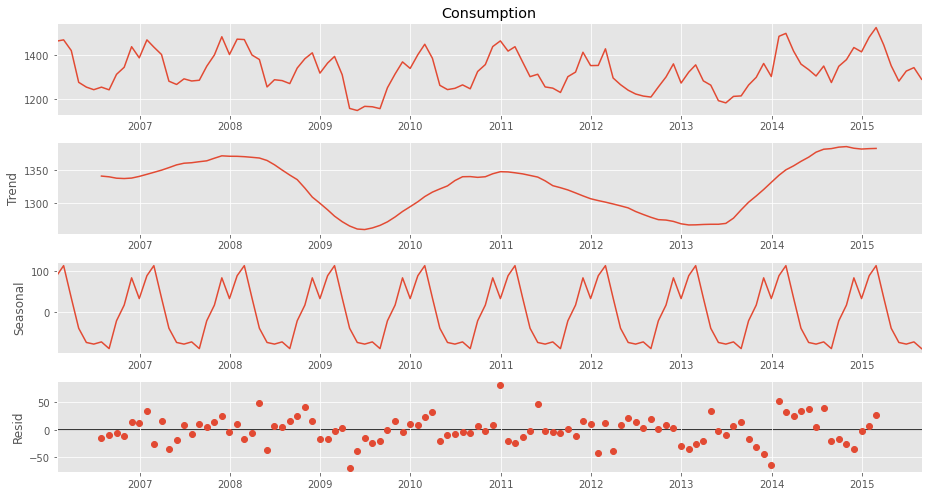

In [39]:
sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()
None

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df.Date = pd.to_datetime(df.Date)
print(df.shape)
df.head()

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [60]:
df = df.set_index('Date').fillna(0)

In [61]:
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,0.000,0.000,0.000
2006-01-02,1380.52100,0.000,0.000,0.000
2006-01-03,1442.53300,0.000,0.000,0.000
2006-01-04,1457.21700,0.000,0.000,0.000
2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [62]:
df = df.resample('M').sum()

In [63]:
df['pct_wind'] = df.Wind / df.Consumption
df['pct_solar'] = df.Solar / df.Consumption

<AxesSubplot:xlabel='Date'>

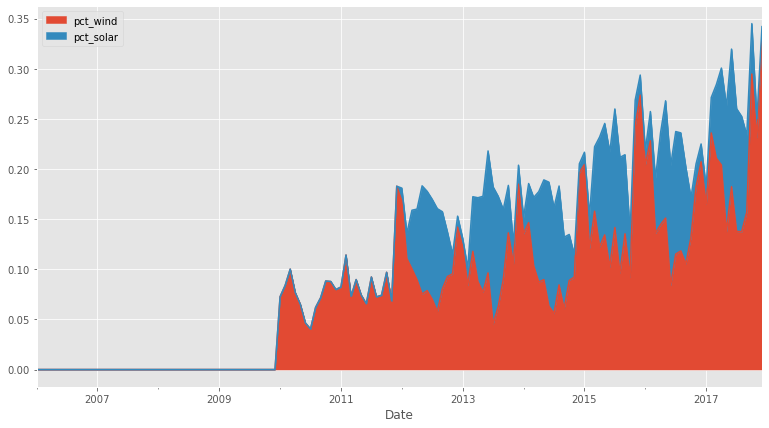

In [64]:
df[['pct_wind', 'pct_solar']].plot.area()

## Bonus

- store item data: lag plot hued by day of week
- German Energy Data: show changing source over time
- Store Item Data: visualize different items over time